In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Accessing Data

In [2]:
df_vehicle = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df_vehicle.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df_vehicle.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [4]:
df_vehicle.isnull().sum()

VIN (1-10)                 0
County                     3
City                       3
State                      0
Postal Code                3
Model Year                 0
Make                       0
Model                      0
Electric Vehicle Type      0
CAFV Eligibility           0
Electric Range             0
Base MSRP                  0
Legislative District     341
DOL Vehicle ID             0
Vehicle Location           7
Electric Utility           3
2020 Census Tract          3
dtype: int64

In [5]:
df_vehicle.dropna(inplace=True)

In [6]:
df_vehicle.isnull().sum()

VIN (1-10)               0
County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV Eligibility         0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Vehicle Location         0
Electric Utility         0
2020 Census Tract        0
dtype: int64

In [7]:
df_vehicle.shape

(150137, 17)

In [8]:
df_vehicle["Make"].value_counts(dropna=False)

TESLA                   68821
NISSAN                  13481
CHEVROLET               12003
FORD                     7592
BMW                      6426
KIA                      6186
TOYOTA                   5195
VOLKSWAGEN               4064
VOLVO                    3529
JEEP                     3283
HYUNDAI                  3164
AUDI                     2998
CHRYSLER                 2626
RIVIAN                   2482
MERCEDES-BENZ            1053
PORSCHE                  1027
MITSUBISHI                848
HONDA                     808
FIAT                      806
MINI                      791
POLESTAR                  763
SUBARU                    622
SMART                     274
LINCOLN                   228
JAGUAR                    228
LUCID                     190
CADILLAC                  175
LEXUS                     138
MAZDA                     136
GENESIS                   107
LAND ROVER                 46
FISKER                     16
ALFA ROMEO                 12
AZURE DYNA

In [9]:
make_range_mean = df_vehicle.groupby('Make')['Electric Range'].mean()
make_range_mean = make_range_mean.sort_values(ascending=False)
make_range_mean

Make
JAGUAR                  204.236842
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                95.334333
TESLA                    90.237006
FIAT                     85.626551
NISSAN                   84.728804
SMART                    62.375912
AZURE DYNAMICS           56.000000
AUDI                     53.507338
KIA                      52.655512
PORSCHE                  46.629017
HONDA                    46.626238
BMW                      38.207905
POLESTAR                 36.034076
ALFA ROMEO               33.000000
FISKER                   33.000000
CHRYSLER                 32.242574
MITSUBISHI               29.793632
VOLKSWAGEN               28.352608
TOYOTA                   26.892782
MAZDA                    26.000000
HYUNDAI                  24.000000
LINCOLN                  23.640351
LEXUS                    22.521739
JEEP                     22.326531
LAND ROVER               21.782609
MINI                     20.826802
CADILLAC       

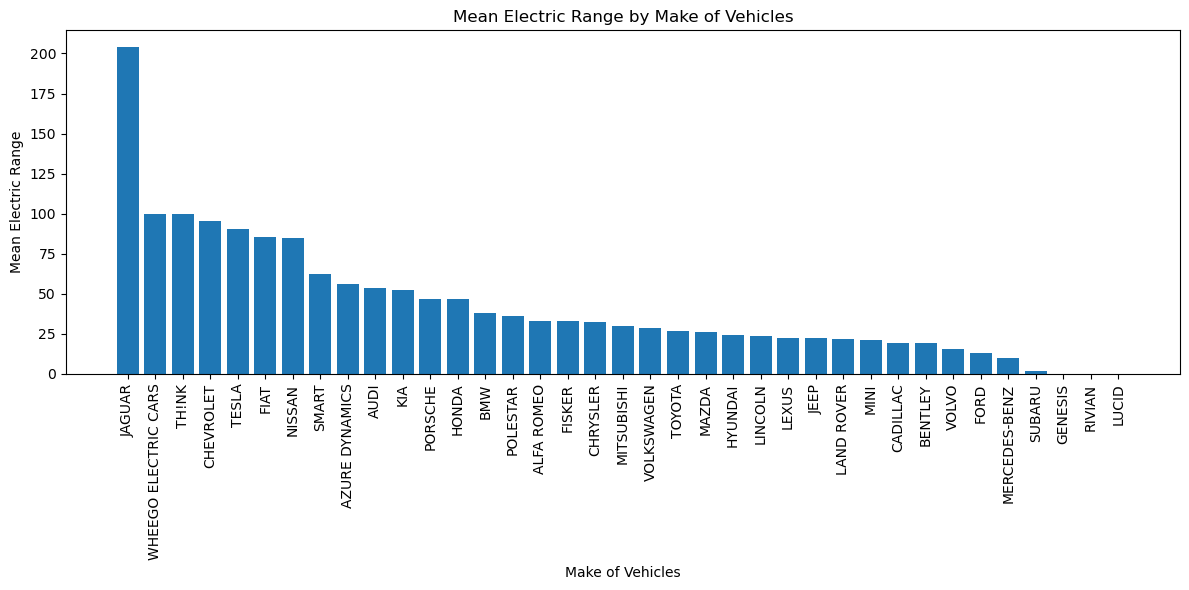

In [10]:
plt.figure(figsize=(12, 6))  
plt.bar(make_range_mean.index, make_range_mean.values)
plt.xlabel('Make of Vehicles')
plt.ylabel('Mean Electric Range')
plt.title('Mean Electric Range by Make of Vehicles')
plt.xticks(rotation=90)  
plt.tight_layout()


plt.show()

In [11]:
make_type_range_mean = df_vehicle.groupby(['Make', 'Electric Vehicle Type'])['Electric Range'].mean()
make_type_range_mean = make_type_range_mean.sort_values(ascending=False)
make_type_range_mean = make_type_range_mean.reset_index()
make_type_range_mean.head()

,Make,Electric Vehicle Type,Electric Range
0,JAGUAR,Battery Electric Vehicle (BEV),204.236842
1,CHEVROLET,Battery Electric Vehicle (BEV),129.516908
2,WHEEGO ELECTRIC CARS,Plug-in Hybrid Electric Vehicle (PHEV),100.000000
3,TH!NK,Battery Electric Vehicle (BEV),100.000000
4,TESLA,Battery Electric Vehicle (BEV),90.237006


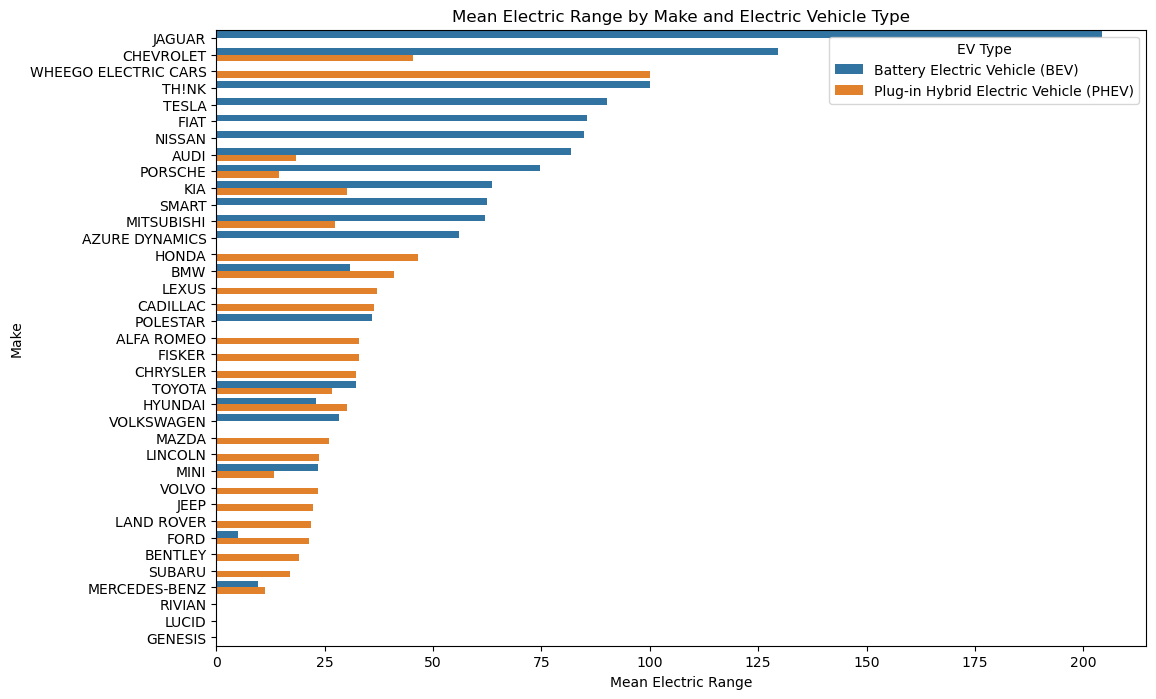

In [12]:
# Set up the figure
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Create a bar plot
sns.barplot(
    x='Electric Range',  
    y='Make',             
    hue='Electric Vehicle Type', 
    data=make_type_range_mean,    
    orient='h'            
)

# Customize the plot
plt.title('Mean Electric Range by Make and Electric Vehicle Type')
plt.xlabel('Mean Electric Range')
plt.ylabel('Make')
plt.legend(title='EV Type', loc='upper right')

# Show the plot
plt.show()

In [13]:
pivot_table = make_type_range_mean.pivot(index='Electric Vehicle Type', columns='Make', values='Electric Range')
pivot_table

Make,ALFA ROMEO,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,...,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS
Electric Vehicle Type,,,,,,,,,,,,,,,,,,,,,
Battery Electric Vehicle (BEV),NaN,81.888889,56.0,NaN,30.833240,0.0,129.516908,NaN,85.626551,NaN,...,74.740402,0.0,62.375912,0.0,90.237006,100.0,32.196809,28.352608,0.000000,NaN
Plug-in Hybrid Electric Vehicle (PHEV),33.0,18.485097,NaN,19.0,41.061947,36.5,45.371411,32.242574,NaN,33.0,...,14.593750,NaN,NaN,17.0,NaN,NaN,26.693629,NaN,23.465928,100.0


In [14]:
cafv_missing_values = df_vehicle['CAFV Eligibility'].isnull().sum()
print(f"Number of missing values in CAFV Eligibility: {cafv_missing_values}")

Number of missing values in CAFV Eligibility: 0


In [15]:
cafv_unique_values = df_vehicle['CAFV Eligibility'].unique()
print("Unique values in CAFV Eligibility:", cafv_unique_values)

Unique values in CAFV Eligibility: ['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range'
 'Eligibility unknown as battery range has not been researched']


In [16]:
df_vehicle = df_vehicle[df_vehicle['CAFV Eligibility'] != 'Eligibility unknown as battery range has not been researched']
df_vehicle.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


Text(0.5, 1.0, 'Distribution of Model Year')

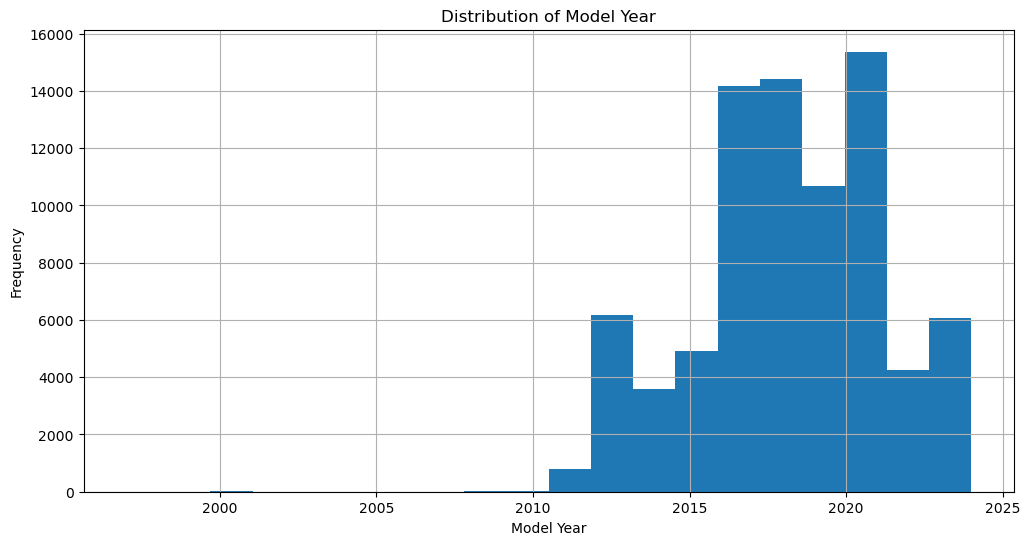

In [17]:
# Visualize the distribution of numerical variables
plt.figure(figsize=(12, 6))
# plt.subplot(2, 2, 1)
df_vehicle['Model Year'].hist(bins=20)
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Distribution of Model Year')


Text(0.5, 1.0, 'Distribution of Electric Range')

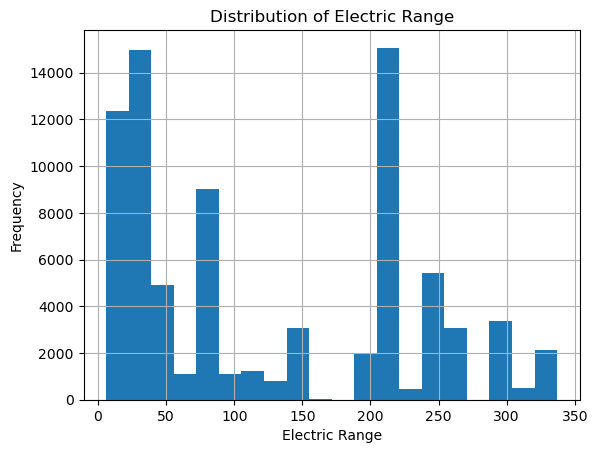

In [18]:
df_vehicle['Electric Range'].hist(bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')

Text(0.5, 1.0, 'Distribution of Base MSRP')

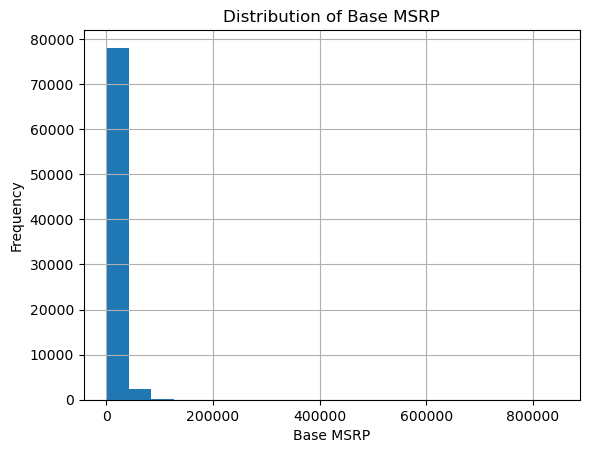

In [19]:
df_vehicle['Base MSRP'].hist(bins=20)
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of Base MSRP')

Text(0.5, 1.0, 'Distribution of Vehicle Makes')

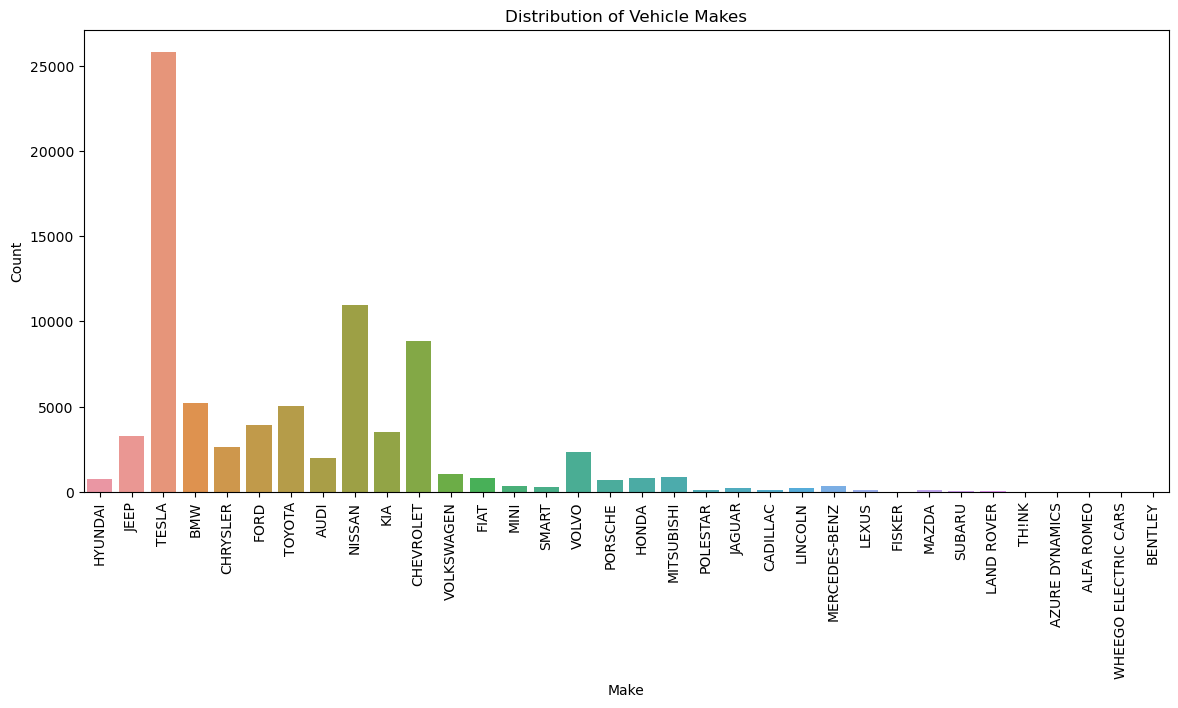

In [20]:
# Visualize the distribution of categorical variables
plt.figure(figsize=(14, 6))
sns.countplot(data=df_vehicle, x='Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.title('Distribution of Vehicle Makes')

Text(0.5, 1.0, 'Distribution of Electric Vehicle Types')

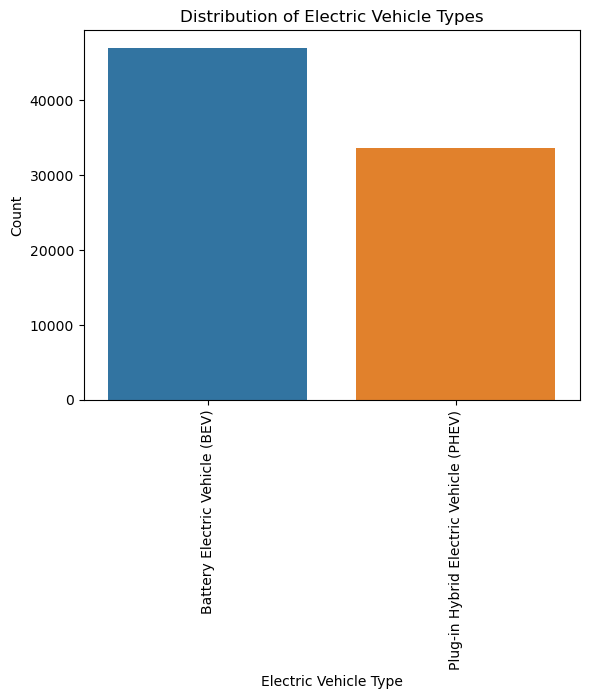

In [21]:
# Distribution of Electric Vehicles
sns.countplot(data=df_vehicle, x='Electric Vehicle Type')
plt.xticks(rotation=90)
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types')

C:\Users\rohai\AppData\Local\Temp\ipykernel_23528\800973737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_vehicle.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

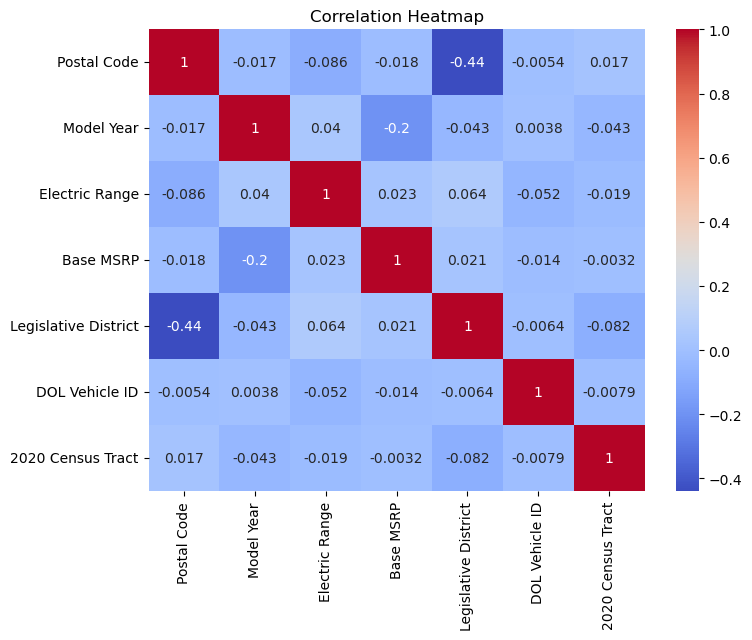

In [22]:
# Correlation analysis
correlation_matrix = df_vehicle.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')


Text(0.5, 1.0, 'Box Plot of Electric Range')

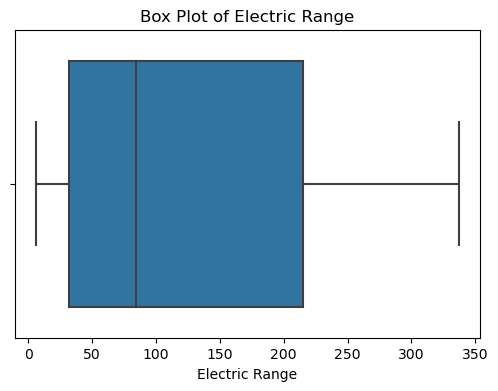

In [23]:
# Outlier detection (example for Electric Range)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_vehicle['Electric Range'])
plt.xlabel('Electric Range')
plt.title('Box Plot of Electric Range')